In [15]:
#14장 메인 1

class Character:
    total_character_cnt = 0
    
    def __init__(self, name, hp, ad):
        self.name = name
        self.strength = hp
        self.attack_damage = ad
        print('Character 클래스의 객체 생성 ->', self.name)
        Character.total_character_cnt += 1
        print('현재 캐릭터 개수 = ', Character.total_character_cnt)
        
    def information(self):
        print('이름 :', self.name, ', 체력:', self.strength, ', 공격력:', self.attack_damage)
        
    def attack(self, target):
        print(self.name, '이/가', target.name, '(', target.strength, ')', '을/를 공격합니다.')
        target.strength -= self.attack_damage
        print('공격 성공!', target.name, '(', target.strength, ')')
        
    def level_up(self):
        self.strength *= 1.2
        self.attack_damage += 5
        
        print('레벨 업 ! -')

swordsman = Character('검술사', 100, 10)
theif = Character('도적', 85, 8)
fairy = Character('요정', 60, 5)

swordsman.information()
swordsman.level_up()
swordsman.information()
swordsman.attack(fairy)

Character 클래스의 객체 생성 -> 검술사
현재 캐릭터 개수 =  1
Character 클래스의 객체 생성 -> 도적
현재 캐릭터 개수 =  2
Character 클래스의 객체 생성 -> 요정
현재 캐릭터 개수 =  3
이름 : 검술사 , 체력: 100 , 공격력: 10
레벨 업 ! -
이름 : 검술사 , 체력: 120.0 , 공격력: 15
검술사 이/가 요정 ( 60 ) 을/를 공격합니다.
공격 성공! 요정 ( 45 )


In [26]:
#14장 메인 2

class Product:
    def __init__(self, n, p, s):
        self.name, self.price, self.stock = n, p, s
        
    def information(self):
        print('상품 이름 :', self.name)
        print('상품 가격 :', self.price)
        print('재고 수량 :', self.stock)

class Member:
    def __init__(self, n, d):
        self.name, self.join_data = n, d
        self.purchase_list = []
        self.purchase_amount = 0
        
    def information(self):
        print('회원 이름 :', self.name)
        print('가입 날짜 :', self.join_data)
        print('구매 내역 :', self.purchase_list)
        print('누적 구매 금액 :', self.purchase_amount)
        
    def buy(self, product, count):
        print(self.name, '고객님이', product.name, count, '개 구매')
        product.stock -= count #구매 수량만큼 재고 감소
        self.purchase_list.append(product.name) #구매 내역에 상품 추가
        self.purchase_amount += (product.price * count) #누적 구매 금액 증가
        
socks = Product('socks', 1000, 10)
books = Product('books', 17500, 15)

Anna = Member('Anna', '20200420')
Grace = Member('Grace', '20200130')

Anna.buy(socks, 1)
Grace.buy(books, 2)
Anna.information()
Grace.information()
print('')
socks.information()
books.information()

pen = Product('pen', 1200, 25)
Anna.buy(pen, 5)
Anna.information()

Anna 고객님이 socks 1 개 구매
Grace 고객님이 books 2 개 구매
회원 이름 : Anna
가입 날짜 : 20200420
구매 내역 : ['socks']
누적 구매 금액 : 1000
회원 이름 : Grace
가입 날짜 : 20200130
구매 내역 : ['books']
누적 구매 금액 : 35000

상품 이름 : socks
상품 가격 : 1000
재고 수량 : 9
상품 이름 : books
상품 가격 : 17500
재고 수량 : 13
Anna 고객님이 pen 5 개 구매
회원 이름 : Anna
가입 날짜 : 20200420
구매 내역 : ['socks', 'pen']
누적 구매 금액 : 7000


핫플레이스가 위치한 행정동을 입력하세요 : 압구정동
핫플레이스가 위치한 행정동을 입력하세요 : 역삼2동
비교할 행정동을 입력하세요 : 행당1동


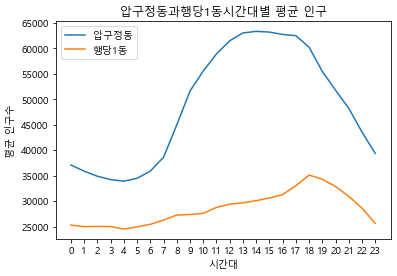

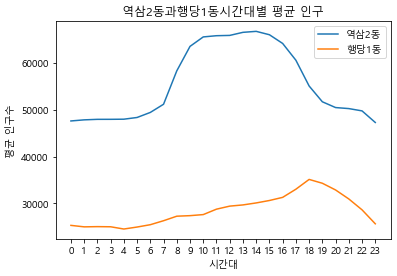

In [40]:
#14장 메인 3

import matplotlib.pyplot as plt
import csv
import datetime

def file_open():
    f1 = open('LOCAL_PEOPLE_DONG_201912.csv', encoding= 'utf8')
    f2 = open('dong_code.csv')

    data = csv.reader(f1)
    next(data)
    data = list(data)

    code_data = csv.reader(f2)
    next(code_data)
    next(code_data)
    code_data = list(code_data)

    for row in data:
        for i in range(1, 32):
            if i <= 2:
                row[i] = int(row[i])
            else:
                row[i] = float(row[i])
            
    for row in code_data:
        row[1] = int(row[1])
        
    return data, code_data

def dong_search(dong_name):
    for row in code_data:
        if row[-1] == dong_name:
            dong_code = row[1]
            
    return dong_code
            
class Hotplace:
    def __init__(self, dong_name, dong_code):
        self.name = dong_name
        self.code = dong_code
        
    def graph_plot(self, popu_list, label_list, graph_title):
        plt.rc('font', family='Malgun Gothic')
        plt.title(graph_title)
    
        for i in range(len(popu_list)):
            plt.plot(range(24), popu_list[i], label=label_list[i])
    
        plt.legend()
        plt.xlabel('시간대')
        plt.ylabel('평균 인구수')
        plt.xticks(range(24), range(24))
        plt.show()
        
    def analysis1(self, dong_name, dong_code, graph_yn='y'):
        population = [0 for i in range(24)]
    
        for row in data:
            if row[2] == dong_code:
                population[row[1]] += row[3]
        
        population = [p/31 for p in population]
    
        if graph_yn == 'n':
            return population
    
        population = [population]
        labels = ['평균 인구']
        title = dong_name + '시간대별 평균 인구'
        self.graph_plot(population, labels, title)
    
    def analysis2(self):
        weekday = [0 for i in range(24)]
        weekend = [0 for i in range(24)]

        for row in data:
            if row[2] == self.code:
                time, p = row[1], row[3]
                year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
                num = datetime.date(year, mon, day).weekday()
            if num < 5:
                weekday[time] += p
            else:
                weekend[time] += p

    #주말, 주중 일수 세서 평균 인구 구하기
        weekday_cnt, weekend_cnt = 0, 0

        for i in range(1, 32): #31일 까지
            if datetime.date(2019, 12, i).weekday() < 5:
                weekday_cnt += 1
            else:
                weekend_cnt += 1
        
        print('2019년 12월의 주중 일수 =', weekday_cnt, '주말 일수 =', weekend_cnt)

        weekday = [w/weekday_cnt for w in weekday]
        weekend = [w/weekend_cnt for w in weekend]

        data_set = [weekday, weekend]
        labels = ['주중', '주말']
        title = self.name + '주중/주말 시간대별 평균 인구'
        self.graph_plot(data_set, labels, title)
        
    def analysis3(self):
        male = [0 for i in range(24)]
        female = [0 for i in range(24)]

        for row in data:
            if row[2] == self.code:
                time = row[1]
        
                male[time] += sum(row[4:18])
                female[time] += sum(row[18:32])
        
        male = [m/31 for m in male]
        female =[f/31 for f in female]
    
        data_set = [male, female]
        labels = ['남성', '여성']
        title = self.name + '남녀 시간대별 평균 인구'
        self.graph_plot(data_set, labels, title)
        
    def analysis4(self, dong_name2, dong_code2):
        population1 = self.analysis1(self.name, self.code, graph_yn='n')
        population2 = self.analysis1(dong_name2, dong_code2, graph_yn='n')
    
        data_set = [population1, population2]
        labels = [self.name, dong_name2]
        title = self.name + '과' + dong_name2 + '시간대별 평균 인구'
        self.graph_plot(data_set, labels, title)
    
data, code_data = file_open()
input_name1 = input('핫플레이스가 위치한 행정동을 입력하세요 : ')
input_code1 = dong_search(input_name1)
dong1 = Hotplace(input_name1, input_code1)

input_name2 = input('핫플레이스가 위치한 행정동을 입력하세요 : ')
input_code2 = dong_search(input_name2)
dong2 = Hotplace(input_name2, input_code2)

input_name3 = input('비교할 행정동을 입력하세요 : ')
input_code3 = dong_search(input_name3)

dong1.analysis4(input_name3, input_code3)
dong2.analysis4(input_name3, input_code3)

In [38]:
#14장 selfcheck

#계좌
class Customer_account:
    def __init__(self, name, bal):
        self.name = name
        self.balance = bal
        print(self.name, '고객님! 계좌를 개설했습니다. 잔고는', self.balance, '원')

#은행
class Bank:
    def __init__(self):
        self.commission = 0
    
    #입금 거래    
    def deposit(self, customer, amount):
        amount -= 500
        self.commission += 500
        customer.balance += amount
        print(customer.name, '고객님', amount, '원 입금')
        print('입금 후 잔고는', customer.balance, '원')
        
    #출금 거래
    def withdrawal(self, customer, amount):
        amount -= 500
        self.commission += 500
        customer.balance -= amount
        print(customer.name, '고객님', amount, '원 출금')
        print('출금 후 잔고는', customer.balance, '원')
    
    #계좌이체 거래
    def send_money(self, sender, reciever, amount):
        amount -= 800
        self.commission += 800
        sender.balance -= amount
        reciever.balance += amount
        print(sender.name, '고객님이', reciever.name, '고객님께', amount, '원 송금')
        print('이체 후 잔고는', sender.name, sender.balance, reciever.name, reciever.balance)

ryan = Customer_account('라이언', 50000)
prodo = Customer_account('프로도', 100000)
bank_a = Bank()

#bank_a.withdrawal(ryan, 15000)
#bank_a.deposit(prodo, 20000)
#bank_a.send_money(ryan, prodo, 25000)

bank_a.deposit(ryan, 10000)
bank_a.send_money(prodo, ryan, 25000)
bank_a.withdrawal(ryan, 30000)
print('현재 은행 수수료 수입 :', bank_a.commission)

라이언 고객님! 계좌를 개설했습니다. 잔고는 50000 원
프로도 고객님! 계좌를 개설했습니다. 잔고는 100000 원
라이언 고객님 9500 원 입금
입금 후 잔고는 59500 원
프로도 고객님이 라이언 고객님께 24200 원 송금
이체 후 잔고는 프로도 75800 라이언 83700
라이언 고객님 29500 원 출금
출금 후 잔고는 54200 원
현재 은행 수수료 수입 : 1800
